# (25) OCs7 -- colormap

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Fig dir (128)

In [2]:
nn = 128
perc = 20
num_k = 7
if nn == 512:
    merge_thres = 0.444
    final_perm = None
elif nn == 128:
    merge_thres = 0.376
    final_perm = {4: 6, 5: 4, 6: 5}
    final_perm = {
        i: final_perm.get(i, i)
        for i in range(num_k)
    }

fig_dir = 'Fig2_OCs'
fig_dir = pjoin(fig_base_dir, 'paper2.0', f'n{nn}-p{perc}', fig_dir)
os.makedirs(fig_dir, exist_ok=True)
print(fig_dir)

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n128-p20/Fig2_OCs

### Save dir

In [3]:
save_dir = pjoin(fig_dir, f"K{num_k}")
os.makedirs(save_dir, exist_ok=True)
print(save_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n128-p20/Fig2_OCs/K7

### Prepare

In [4]:
mice = Mice(nn, load_parcel=True)

### Results

In [5]:
%%time

results = similiarity_results(
    mice=mice,
    perc=perc,
    num_k=num_k,
    merge_thres=merge_thres,
    n_resamples=None,
    final_perm=final_perm,
)
bt = BootStrap(**results['props_ca'])
list(results)

CPU times: user 4.25 s, sys: 2.12 s, total: 6.38 s
Wall time: 6.46 s


['bt_dict', 'props_bo', 'props_ca', 'pi_sorted', 'sim', 'sim_overall']

### OCs

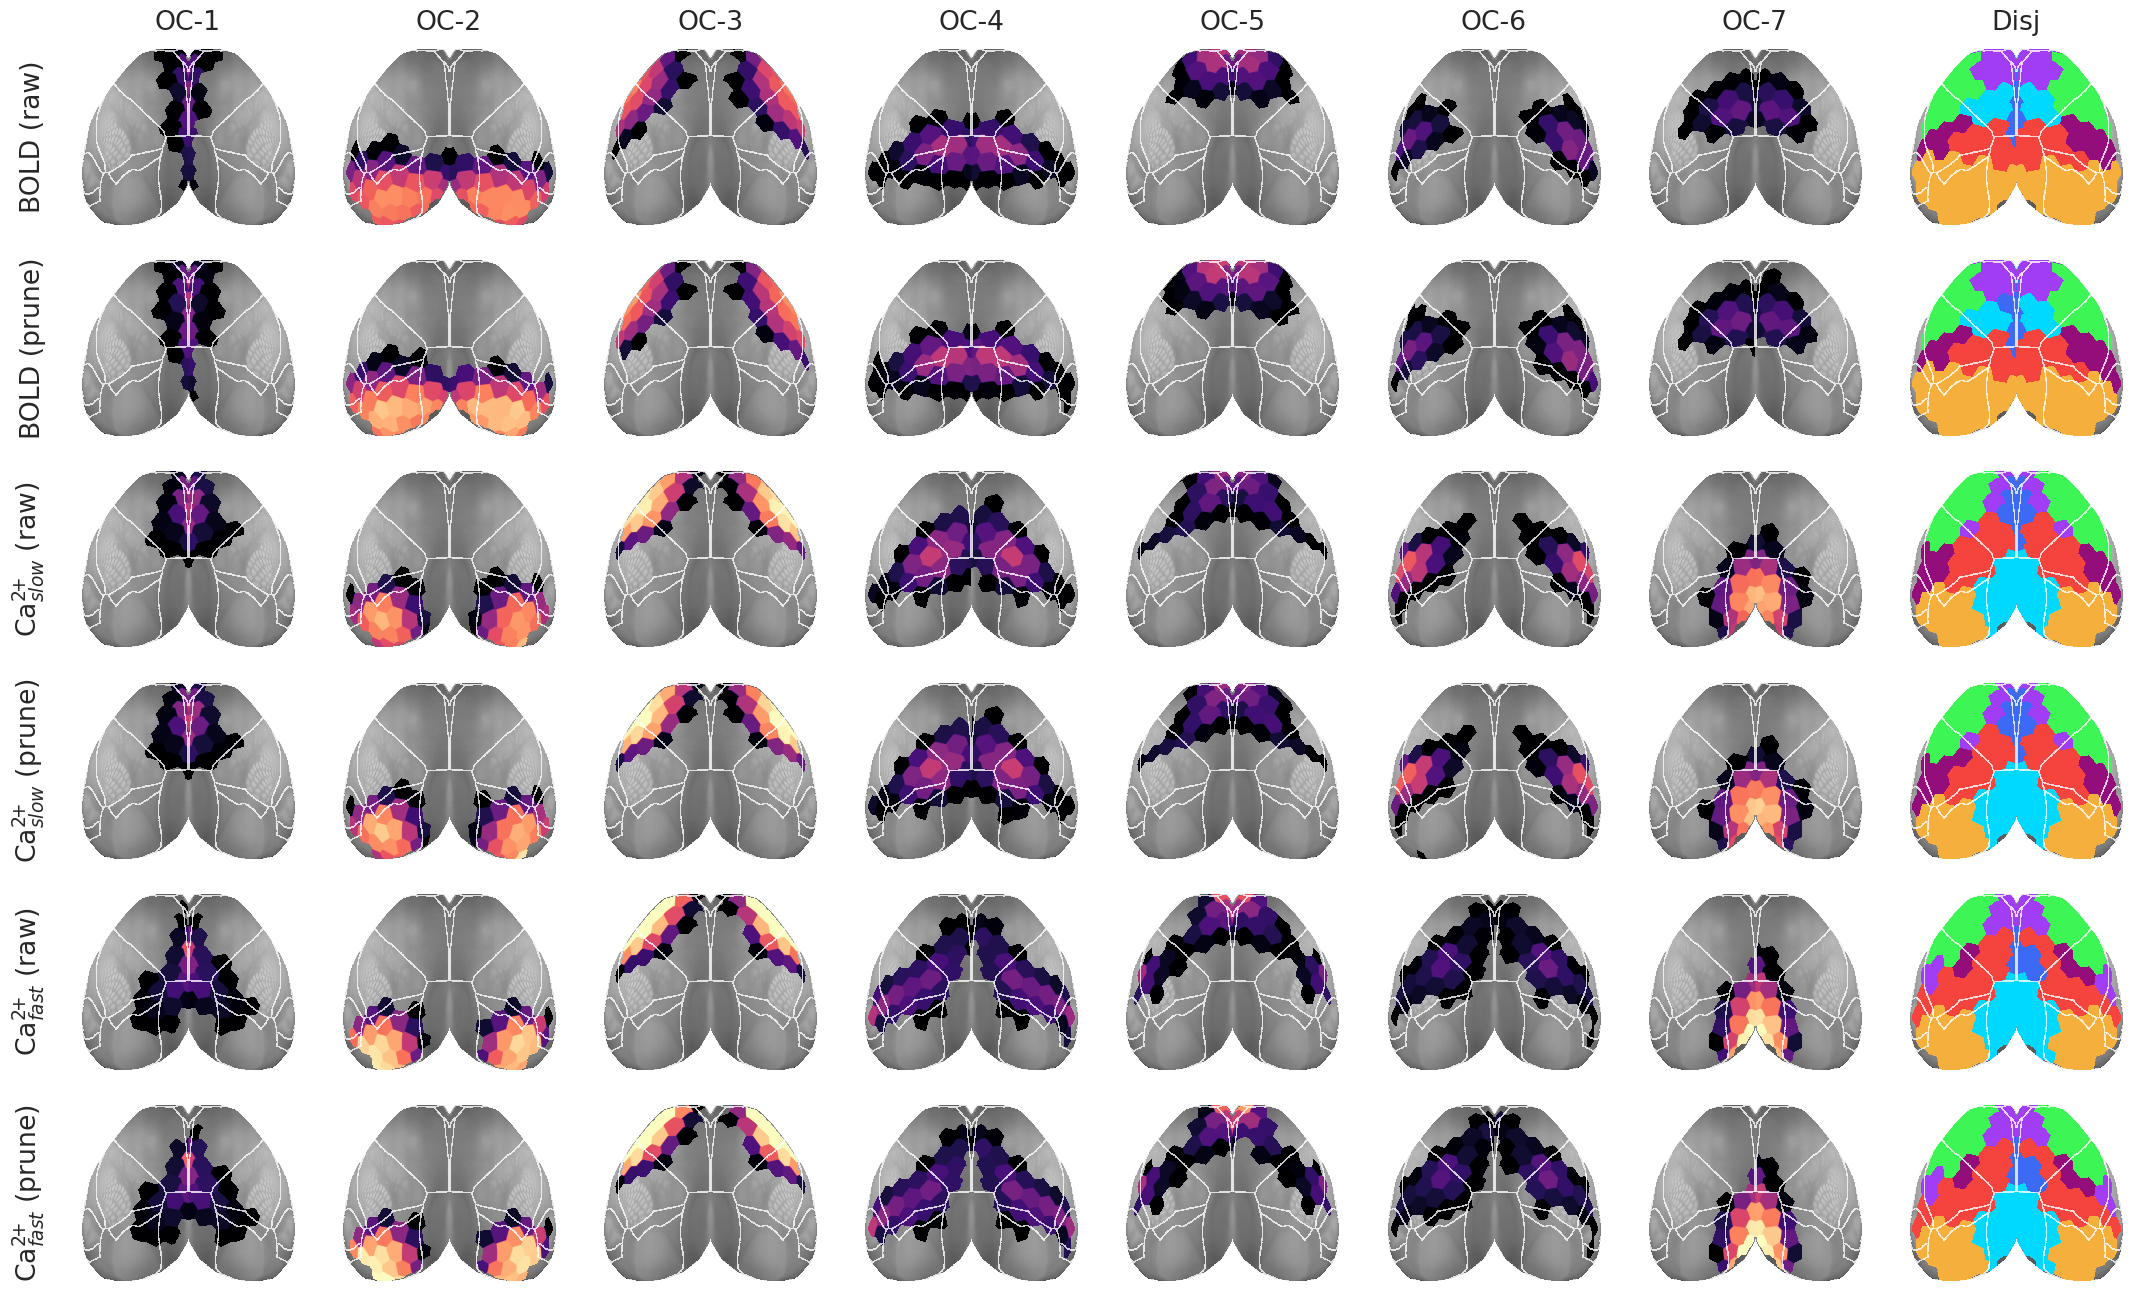

In [6]:
data2show = {}
for key, o in results['bt_dict'].items():
    data2show = {
        **data2show,
        f'{key} (raw)\n': avg(o.run_pi),
        f'{key} (prune)\n': avg(o.pi_prune),
    }
_ = bt.show(data2show, **show_kws(num_k))

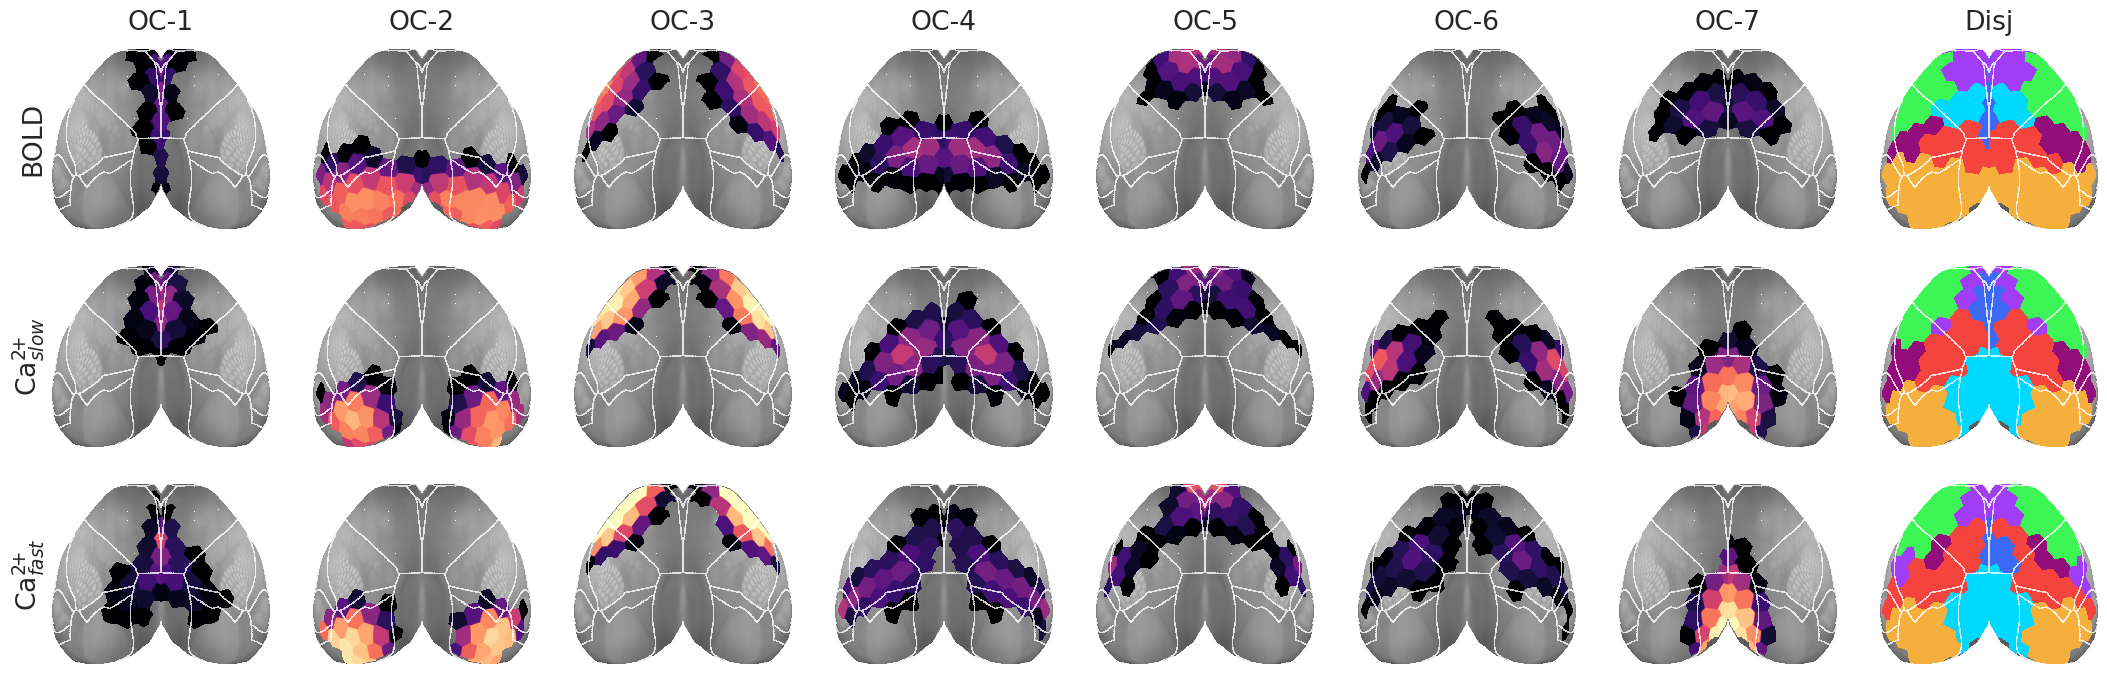

In [7]:
_ = bt.show(results['pi_sorted'], **show_kws(num_k))

### Save Cols & Indiv components

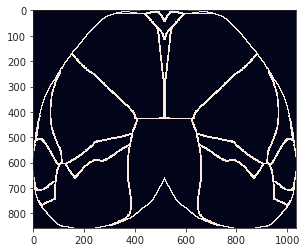

In [8]:
contour = bt.get_contour(0.2, True)
plt.imshow(contour);

In [9]:
from figures.fig_ocs import plot_ocs as go

kwargs = {
    'base': bt,
    'vmin': 0.2,
    'vmax': 0.9,
    'cbar': False,
    'cmap': 'magma',
    'contour': contour,
    'contour_alpha': 0.8,
    'interp': 'antialiased',
    'mask_thres': 1 / num_k,
}
go(
    results['pi_sorted'],
    save_dir=save_dir,
    kws_fig=kws_fig,
    mode2lbl={
        BOLD: 'BOLD',
        CAS: 'CAS',
        CAF: 'CAF'},
    **kwargs,
)

### Similarity plots

#### Plot heatmap

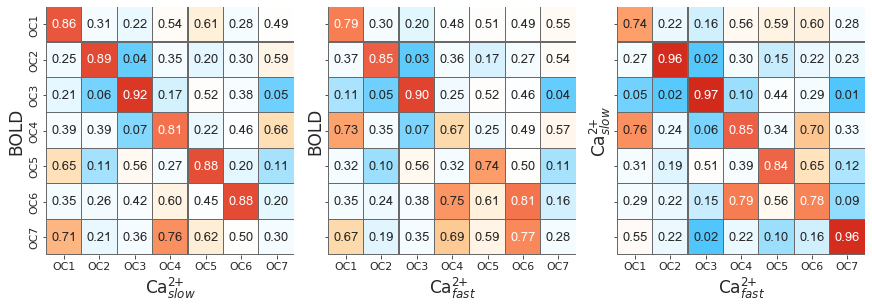

In [10]:
from figures.fig_ocs import similarity_heatmap as go
fig, _ = go(results['sim'], results['sim_overall'], False)

fig.savefig(pjoin(save_dir, 'sim_hm.pdf'), **kws_fig)
fig.savefig(pjoin(save_dir, 'sim_hm.png'), **kws_fig)

#### Cos cbar save

In [3]:
fig_dir = 'Figs_Cbar'
fig_dir = pjoin(fig_base_dir, 'paper2.0', f'n{nn}-p{perc}', fig_dir)
os.makedirs(fig_dir, exist_ok=True)
print(fig_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n128-p20/Figs_Cbar

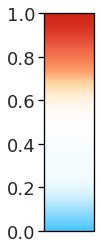

In [4]:
from figures.fig_ocs import cos_cmap
cmap = cos_cmap()

fig, cax, cbar = cbar_only(cmap, vmin=0.0, vmax=1.0, figsize=(0.9, 4), tick_position='left')
# cax.set_title('Cosine\nsim.', fontsize=22, y=1.06, rotation=0)
cax.tick_params(labelsize=18)

fig.savefig(pjoin(fig_dir, f'cos.png'), **kws_fig)
fig.savefig(pjoin(fig_dir, f'cos.pdf'), **kws_fig)
fig

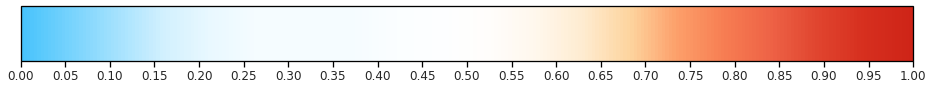

In [5]:
cfig, cax, cbar = cbar_only(cmap, figsize=(16, 1), vertical=False)
cax.locator_params(nbins=20)
cfig.savefig(pjoin(fig_dir, f'cos_large.png'), **kws_fig)
cfig.savefig(pjoin(fig_dir, f'cos_large.pdf'), **kws_fig)
cfig

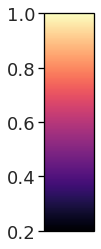

In [7]:
fig, cax, cbar = cbar_only('magma', vmin=0.2, vmax=1.0, figsize=(0.9, 4), tick_position='left')
# cax.set_title('Cosine\nsim.', fontsize=22, y=1.06, rotation=0)
cax.tick_params(labelsize=18)

fig.savefig(pjoin(fig_dir, f'magma.png'), **kws_fig)
fig.savefig(pjoin(fig_dir, f'magma.pdf'), **kws_fig)
fig

## Fig dir (512)

In [2]:
nn = 512
perc = 15
num_k = 7
if nn == 512:
    merge_thres = 0.444
    final_perm = None
elif nn == 128:
    merge_thres = 0.376
    final_perm = {4: 6, 5: 4, 6: 5}
    final_perm = {
        i: final_perm.get(i, i)
        for i in range(num_k)
    }

fig_dir = 'Fig2_OCs'
fig_dir = pjoin(fig_base_dir, 'paper2.0', f'n{nn}-p{perc}', fig_dir)
os.makedirs(fig_dir, exist_ok=True)
print(fig_dir)

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512-p15/Fig2_OCs

### Save dir

In [3]:
save_dir = pjoin(fig_dir, f"K{num_k}")
os.makedirs(save_dir, exist_ok=True)
print(save_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512-p15/Fig2_OCs/K7

### Prepare

In [4]:
mice = Mice(nn, load_parcel=True)

### Results

In [5]:
%%time

results = similiarity_results(
    mice=mice,
    perc=perc,
    num_k=num_k,
    merge_thres=merge_thres,
    n_resamples=None,
    final_perm=final_perm,
)
bt = BootStrap(**results['props_ca'])
list(results)

CPU times: user 10.8 s, sys: 2.98 s, total: 13.8 s
Wall time: 13.8 s


['bt_dict', 'props_bo', 'props_ca', 'pi_sorted', 'sim', 'sim_overall']

### OCs

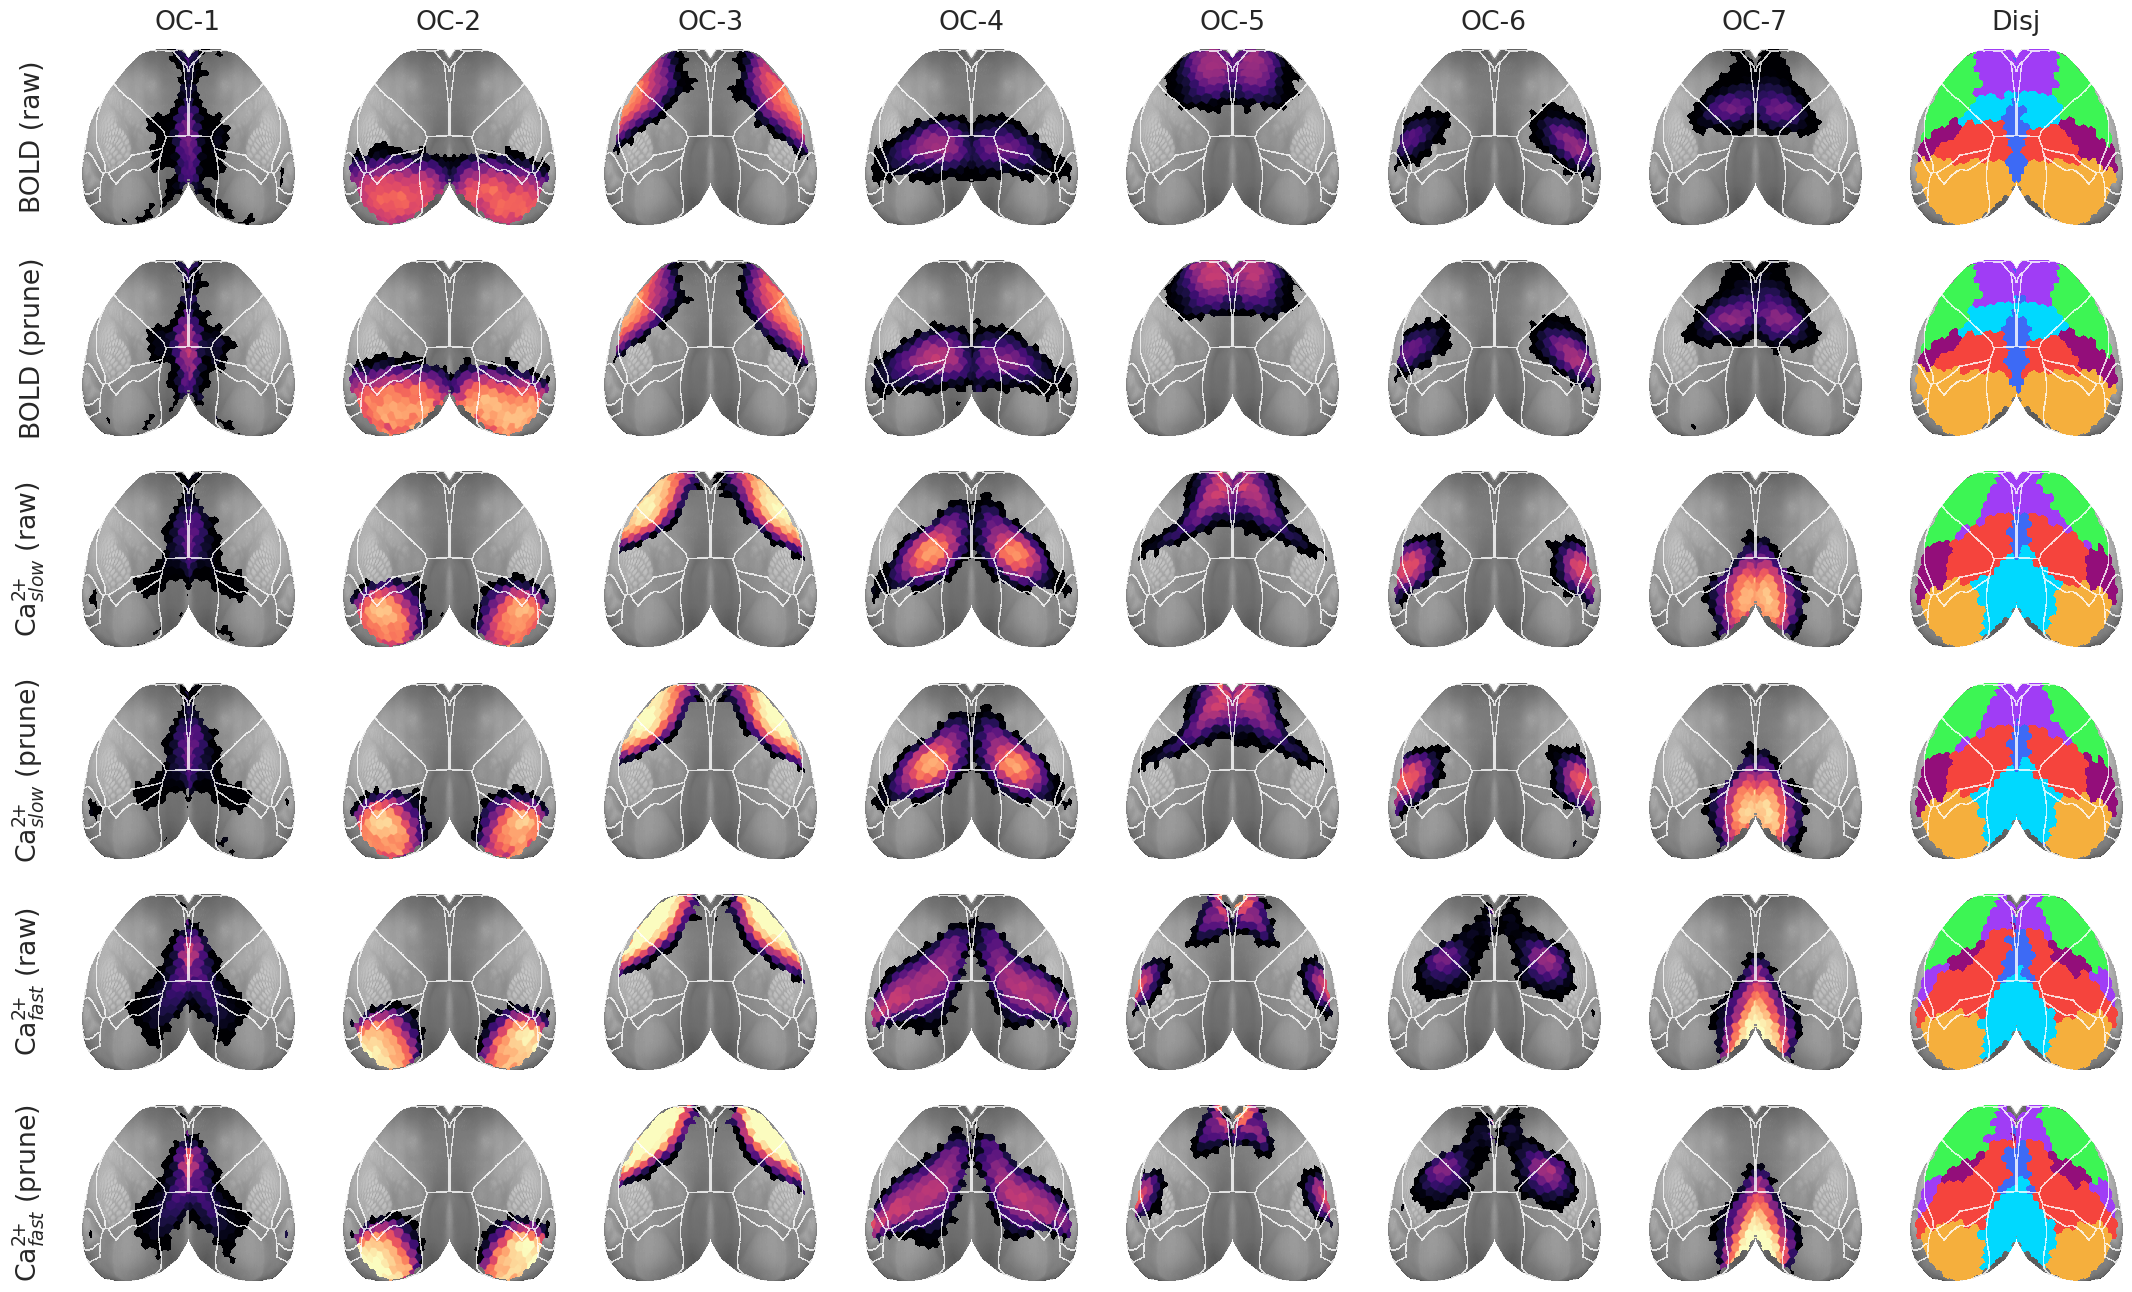

In [6]:
data2show = {}
for key, o in results['bt_dict'].items():
    data2show = {
        **data2show,
        f'{key} (raw)\n': avg(o.run_pi),
        f'{key} (prune)\n': avg(o.pi_prune),
    }
_ = bt.show(data2show, **show_kws(num_k))

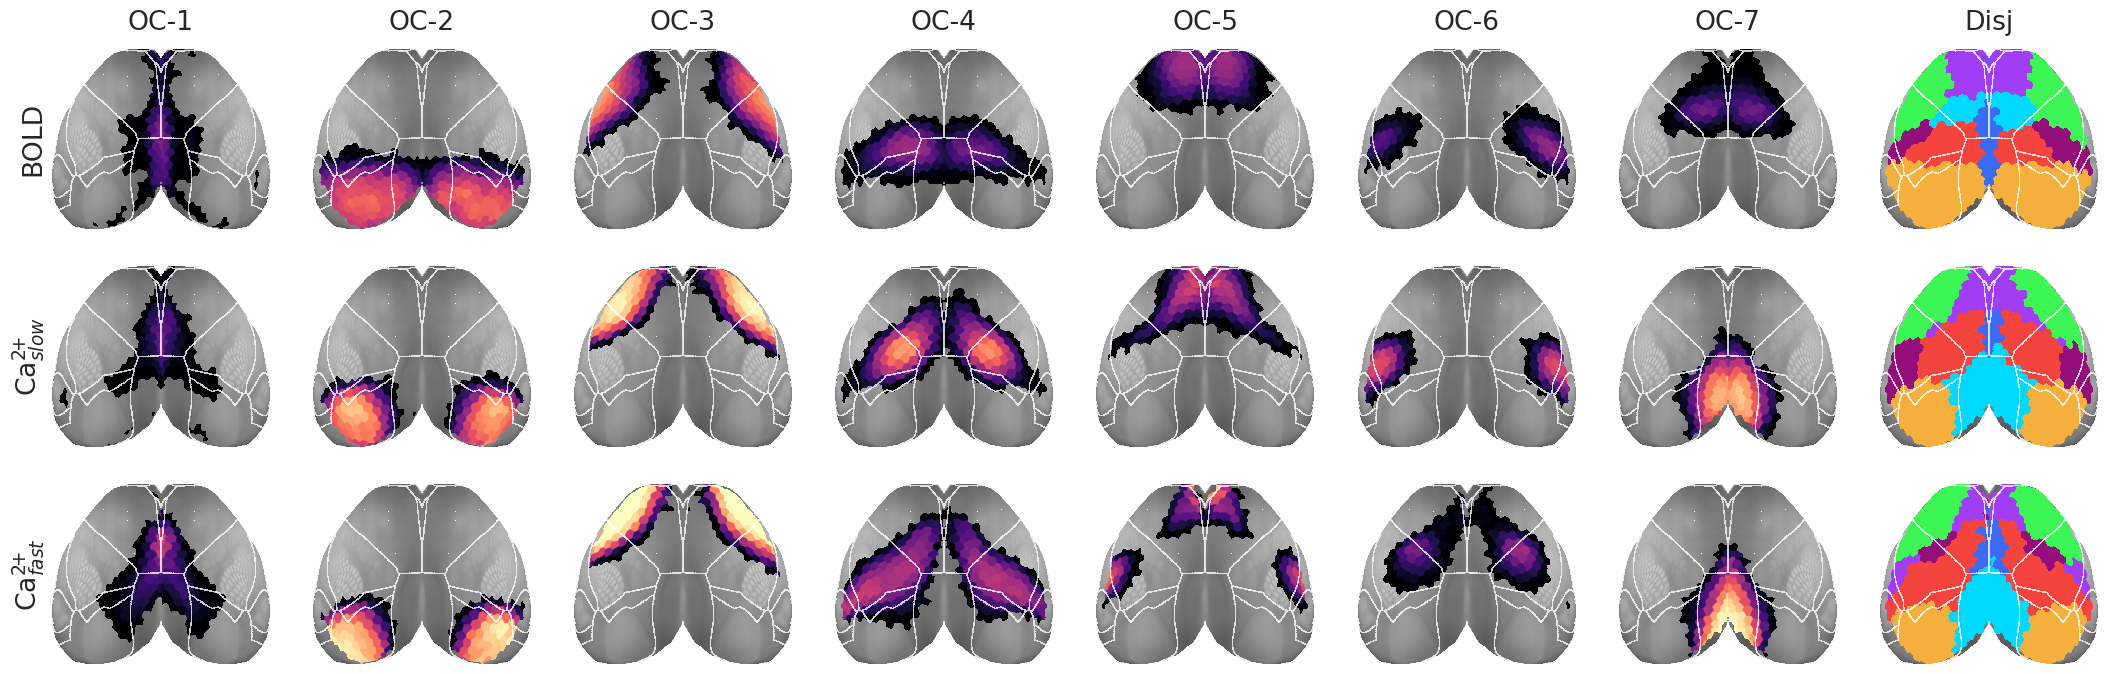

In [7]:
_ = bt.show(results['pi_sorted'], **show_kws(num_k))

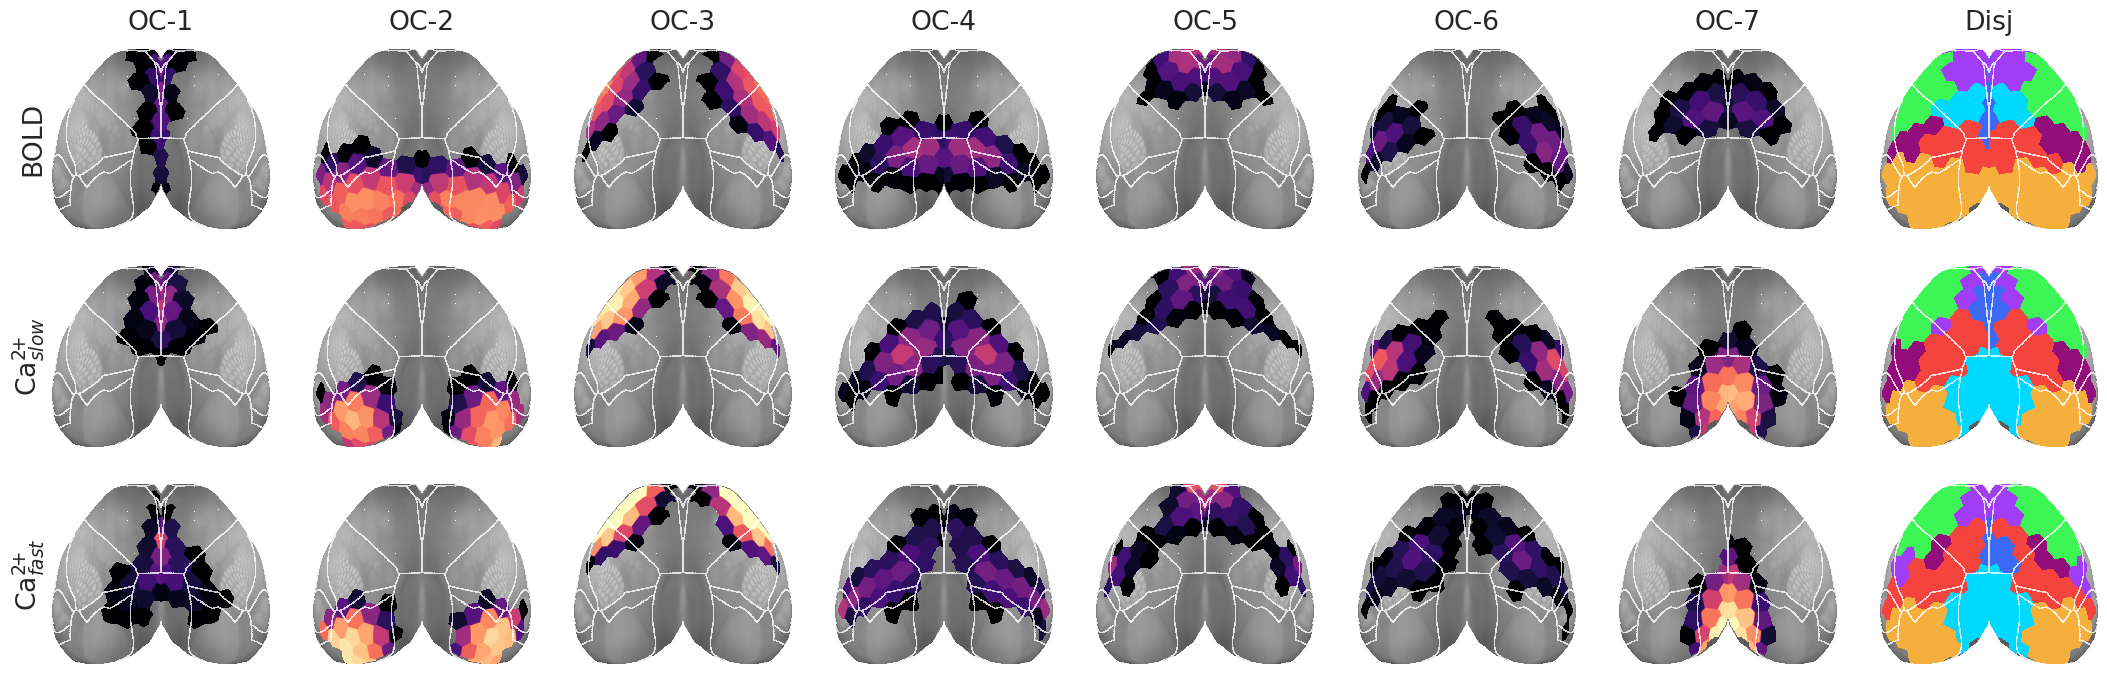

### Save Cols & Indiv components

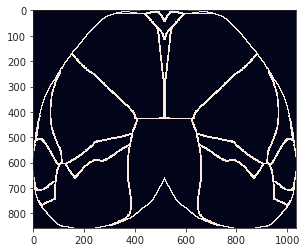

In [8]:
contour = bt.get_contour(0.2, True)
plt.imshow(contour);

In [9]:
from figures.fig_ocs import plot_ocs as go

kwargs = {
    'base': bt,
    'vmin': 0.2,
    'vmax': 0.9,
    'cbar': False,
    'cmap': 'magma',
    'contour': contour,
    'contour_alpha': 0.8,
    'interp': 'antialiased',
    'mask_thres': 1 / num_k,
}
go(
    results['pi_sorted'],
    save_dir=save_dir,
    kws_fig=kws_fig,
    mode2lbl={
        BOLD: 'BOLD',
        CAS: 'CAS',
        CAF: 'CAF'},
    **kwargs,
)

### Similarity plots

#### Plot heatmap

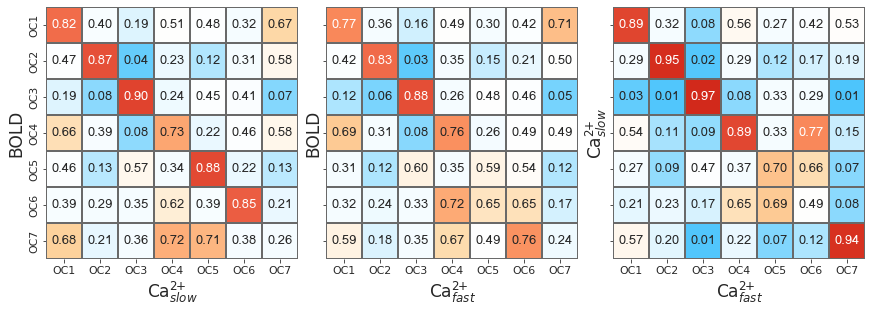

In [10]:
from figures.fig_ocs import similarity_heatmap as go
fig, _ = go(results['sim'], results['sim_overall'], False)

fig.savefig(pjoin(save_dir, 'sim_hm.pdf'), **kws_fig)
fig.savefig(pjoin(save_dir, 'sim_hm.png'), **kws_fig)

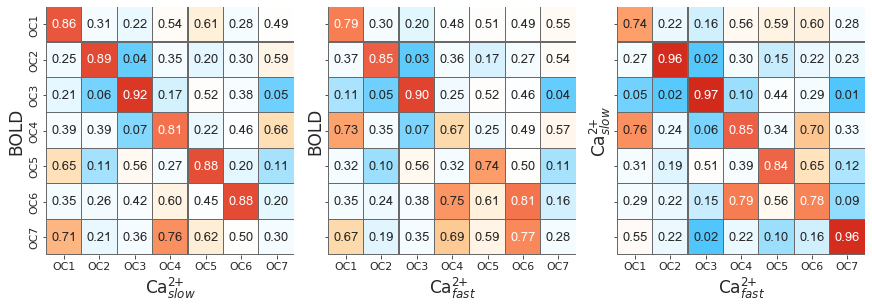

#### Cos cbar save

In [11]:
fig_dir = 'Figs_Cbar'
fig_dir = pjoin(fig_base_dir, 'paper2.0', f'n{nn}-p{perc}', fig_dir)
os.makedirs(fig_dir, exist_ok=True)
print(fig_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512-p15/Figs_Cbar

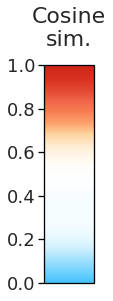

In [12]:
from figures.fig_ocs import cos_cmap
cmap = cos_cmap()

fig, cax, cbar = cbar_only(cmap, vmin=0.0, vmax=1.0, figsize=(0.9, 4), tick_position='left')
cax.set_title('Cosine\nsim.', fontsize=22, y=1.06, rotation=0)
cax.tick_params(labelsize=18)

fig.savefig(pjoin(fig_dir, f'cos.png'), **kws_fig)
fig.savefig(pjoin(fig_dir, f'cos.pdf'), **kws_fig)
fig

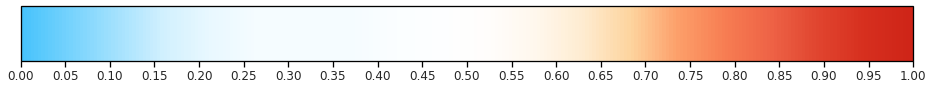

In [13]:
cfig, cax, cbar = cbar_only(cmap, figsize=(16, 1), vertical=False)
cax.locator_params(nbins=20)
cfig.savefig(pjoin(fig_dir, f'cos_large.png'), **kws_fig)
cfig.savefig(pjoin(fig_dir, f'cos_large.pdf'), **kws_fig)
cfig

## Old -- discard

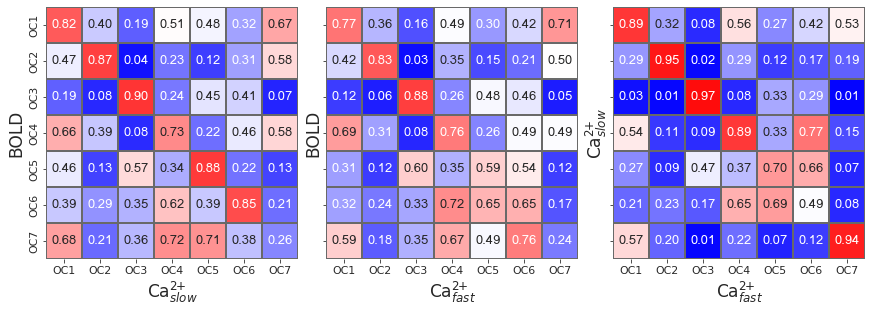

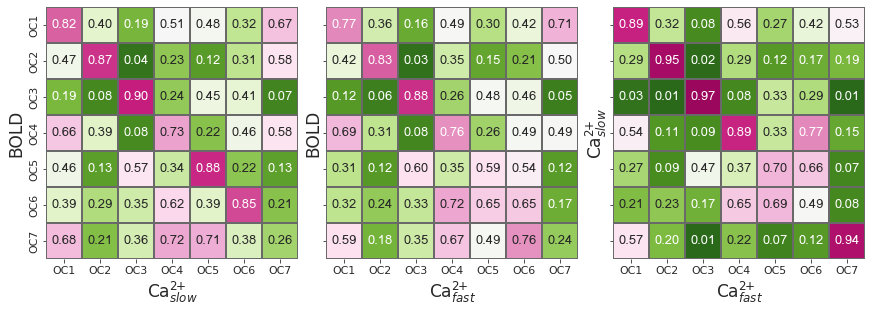

In [10]:
from figures.fig_ocs import similiarity_heatmap as go
fig, _ = go(results['sim'], results['sim_overall'], False, vmin=0, cmap='bwr')
fig, _ = go(results['sim'], results['sim_overall'], False, vmin=0, cmap='PiYG_r')

# fig.savefig(pjoin(save_dir, 'sim_hm.pdf'), **kws_fig)
# fig.savefig(pjoin(save_dir, 'sim_hm.png'), **kws_fig)

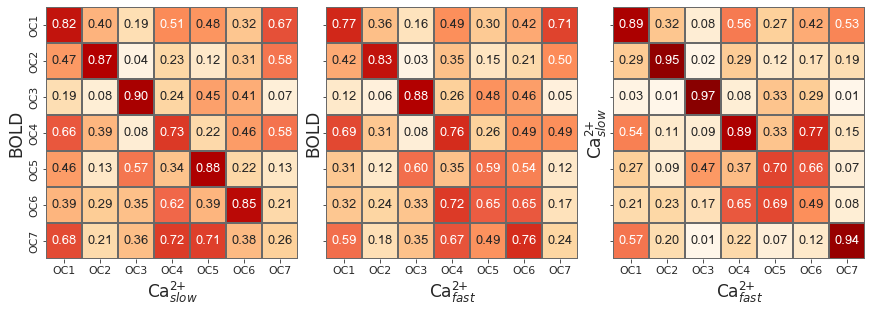

In [11]:
fig, _ = go(results['sim'], results['sim_overall'], False, vmin=0)

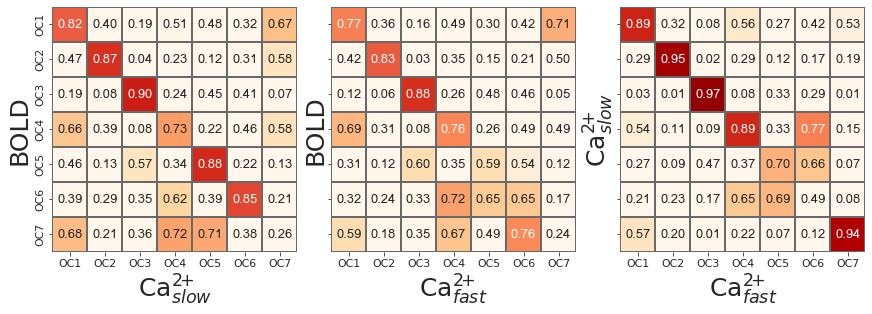

In [13]:
from figures.fig_ocs import similiarity_heatmap as go
fig, _ = go(results['sim'], results['sim_overall'], False, True, label_fontsize=25)

fig.savefig(pjoin(save_dir, 'sim_hm_poster.pdf'), **kws_fig)
fig.savefig(pjoin(save_dir, 'sim_hm_poster.png'), **kws_fig)

### Heatmap with negative values

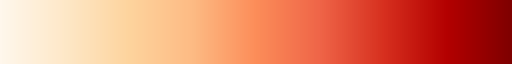

In [14]:
orrd = sns.color_palette('OrRd', as_cmap=True)
orrd

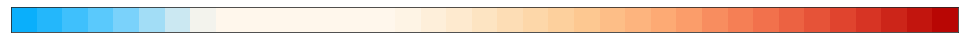

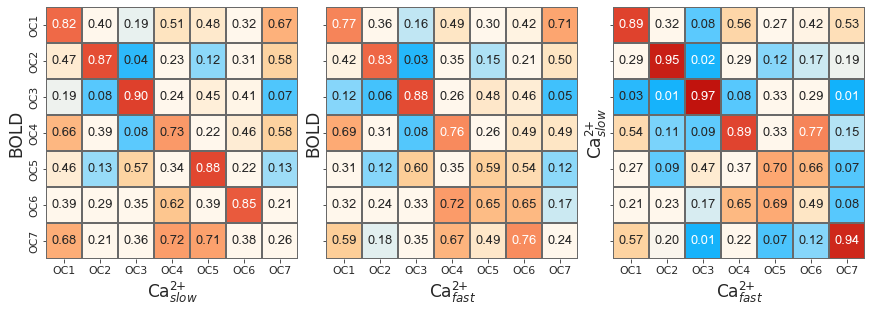

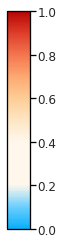

In [77]:
cmap = make_cmap(['#0AAFFB'] + ['#6ccffd'] + ['#fff7ec'] * 2 + [rgb2hex(orrd(i/7)) for i in range(7)])
fig, _ = go(results['sim'], results['sim_overall'], False, vmin=0, cmap=cmap)
fig = cbar_only(cmap)[0]
fig

In [105]:
options = {
    1: ['#18b4fb'] + ['#7dd5fd'] + ['#fff7ec'] + [rgb2hex(orrd(i/7)) for i in range(7)],
    2: ['#48c4fc'] + ['#7ad4fd'] + ['#fff7ec'] + [rgb2hex(orrd(i/7)) for i in range(7)],
    3: ['#18b4fb'] + ['#7dd5fd'] + ['#fff7ec'] + ['#FFFFFF'] + [rgb2hex(orrd(i/6)) for i in range(1, 7)],
    4: ['#18b4fb'] + ['#7dd5fd'] + ['#fff7ec'] + ['#FFFFFF'] * 2 + [rgb2hex(orrd(i/5)) for i in range(1, 6)],
    5: ['#18b4fb'] + ['#7dd5fd'] + ['#FFFFFF'] * 3 + [rgb2hex(orrd(i/6)) for i in range(6)],
}

In [109]:
options = {
    5: ['#18b4fb'] + ['#7dd5fd'] + ['#FFFFFF'] * 3 + [rgb2hex(orrd(i/6)) for i in range(6)],
    6: ['#18b4fb'] + ['#7dd5fd'] + ['#FFFFFF'] * 3 + [rgb2hex(orrd(i/6)) for i in range(1, 7)],
}

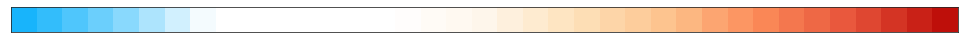

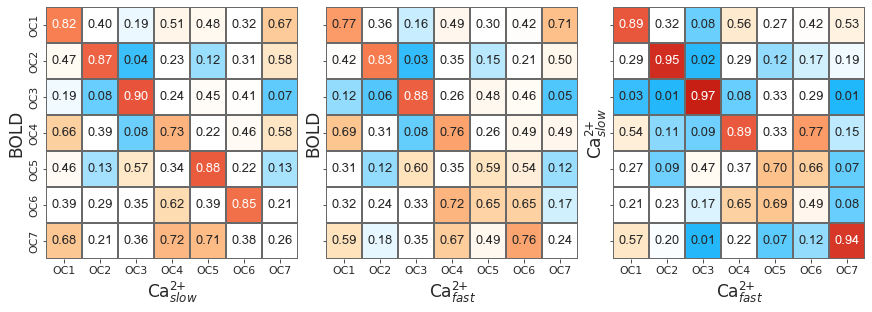

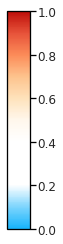

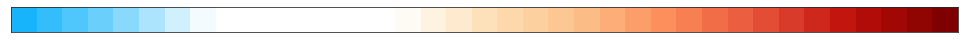

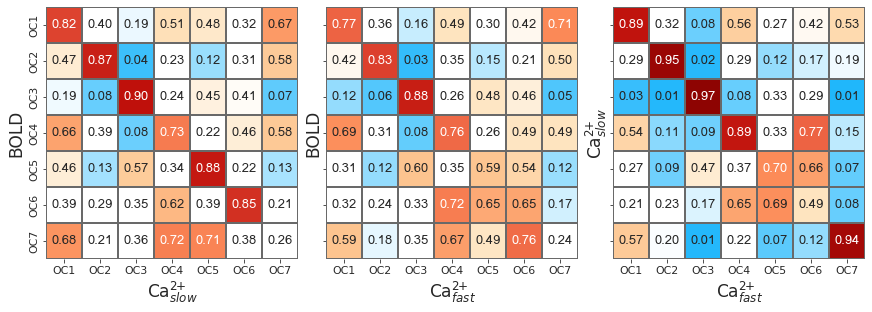

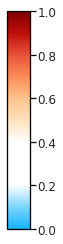

In [110]:
for i, cc in options.items():
    cmap = make_cmap(cc)
    fig, _ = go(results['sim'], results['sim_overall'], False, vmin=0, vmax=1, cmap=cmap)
    fig.savefig(pjoin(save_dir, f'sim_hm_both_{i}.pdf'), **kws_fig)
    fig.savefig(pjoin(save_dir, f'sim_hm_both_{i}.png'), **kws_fig)

    cbar = cbar_only(cmap)[0]
    display(cbar)

### Close 2 final

10

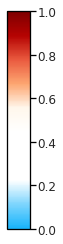

In [142]:
a = 1.3
cc = ['#18b4fb', '#7dd5fd'] + ['#FFFFFF'] * 3 + ['#fff7ec'] * 1 + [rgb2hex(orrd(i * a / 6)) for i in range(2, 6)]
print(len(cc))

cmap = make_cmap(cc, show=False)
cbar = cbar_only(cmap)[0]
display(cbar)

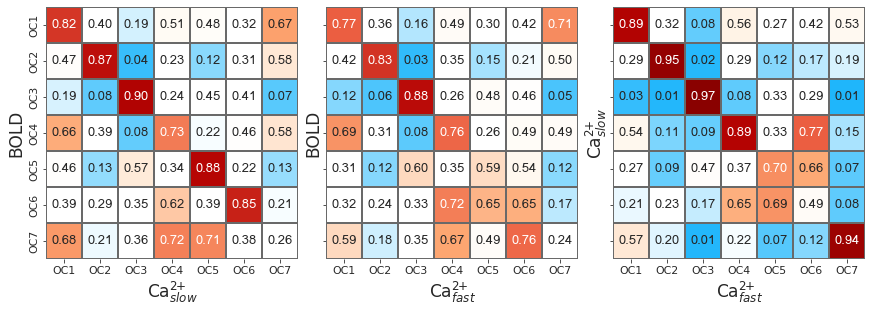

In [143]:
fig, _ = go(results['sim'], results['sim_overall'], False, vmin=0, vmax=1, cmap=cmap)
fig.savefig(pjoin(save_dir, f'sim_hm_both_final.pdf'), **kws_fig)
fig.savefig(pjoin(save_dir, f'sim_hm_both_final.png'), **kws_fig)

### Final?

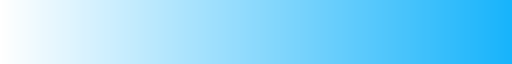

In [179]:
blue = make_cmap([(1,1,1), '#18b4fb'], show=False)
blue

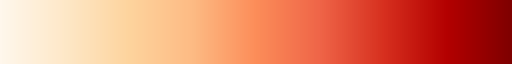

In [184]:
orrd

In [181]:
rgb2hex(blue(0.3))

'#bae9fe'

20

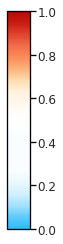

In [289]:
a = 1.3
cc = [blue(f) for f in [0.9, 0.7, 0.4, 0.2, 0.1]] + [blue(0.03)] * 4 + [blue(0.01)] + \
['#fffdfb', orrd(0.0)] + [orrd(f) for f in [0.05, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85]]

print(len(cc))
cmap = make_cmap(cc, show=False)

cbar = cbar_only(cmap)[0]
display(cbar)

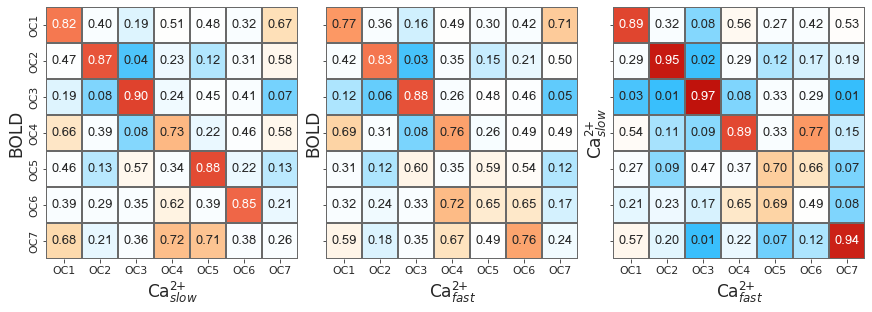

In [286]:
fig, _ = go(results['sim'], results['sim_overall'], False, vmin=0, vmax=1, cmap=cmap)
fig.savefig(pjoin(save_dir, f'sim_hm_both_final.pdf'), **kws_fig)
fig.savefig(pjoin(save_dir, f'sim_hm_both_final.png'), **kws_fig)

## final (truly)

20

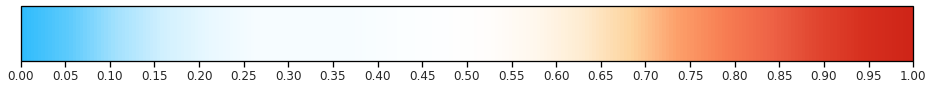

In [361]:
cc = [blue(f) for f in [0.9, 0.7, 0.4, 0.2, 0.1]] + [blue(0.04)] * 3 + [blue(0.02), blue(0.01)] + \
['#fffdfb'] + [orrd(f) for f in [0.0, 0.1, 0.25, 0.45, 0.55, 0.63, 0.70, 0.75, 0.78]]
print(len(cc))
cmap = make_cmap(cc, show=False)

cfig, cax, cbar = cbar_only(cmap, figsize=(16, 1), vertical=False)
cax.locator_params(nbins=20)
display(cfig)

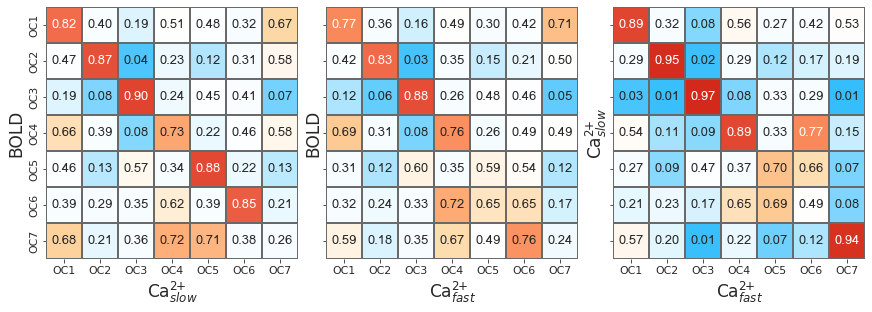

In [362]:
fig, _ = go(results['sim'], results['sim_overall'], False, vmin=0, vmax=1, cmap=cmap)
fig.savefig(pjoin(save_dir, f'sim_hm_both_final_final.pdf'), **kws_fig)
fig.savefig(pjoin(save_dir, f'sim_hm_both_final_final.png'), **kws_fig)

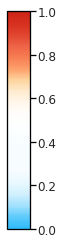

In [363]:
cfig, cax, cbar = cbar_only(cmap)
cax.locator_params(nbins=5)
display(cfig)

## done

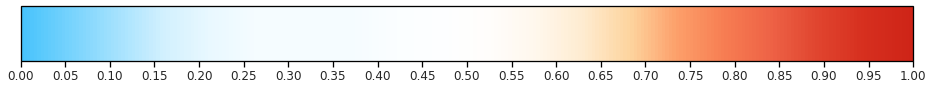

In [8]:
cmap = cos_cmap()

cfig, cax, cbar = cbar_only(cmap, figsize=(16, 1), vertical=False)
cax.locator_params(nbins=20)
display(cfig)

In [10]:
from figures.fig_ocs import similiarity_heatmap as go

fig, _ = go(results['sim'], results['sim_overall'], False, vmin=0, vmax=1, cmap=cmap)
fig.savefig(pjoin(save_dir, f'sim_hm.pdf'), **kws_fig)
fig.savefig(pjoin(save_dir, f'sim_hm.png'), **kws_fig)

NameError: name 'results' is not defined

#### Save cbar

In [385]:
fig_dir = 'Figs_Cbar'
fig_dir = pjoin(fig_base_dir, 'paper2.0', f'n{nn}-p{perc}', fig_dir)
os.makedirs(fig_dir, exist_ok=True)
print(fig_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512-p15/Figs_Cbar

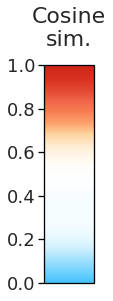

In [386]:
fig, cax, cbar = cbar_only(cmap, vmin=0.0, vmax=1.0, figsize=(0.9, 4), tick_position='left')
cax.set_title('Cosine\nsim.', fontsize=22, y=1.06, rotation=0)
cax.tick_params(labelsize=18)

fig.savefig(pjoin(fig_dir, f'cos.png'), **kws_fig)
fig.savefig(pjoin(fig_dir, f'cos.pdf'), **kws_fig)
fig

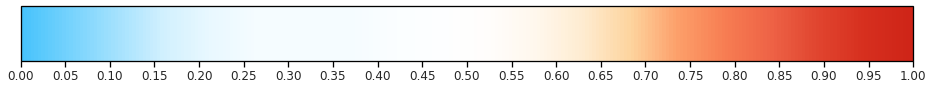

In [390]:
cfig, cax, cbar = cbar_only(cmap, figsize=(16, 1), vertical=False)
cax.locator_params(nbins=20)
cfig.savefig(pjoin(fig_dir, f'cos_large.png'), **kws_fig)
cfig.savefig(pjoin(fig_dir, f'cos_large.pdf'), **kws_fig)
cfig

### *** Different colormaps (start)

In [11]:
_dir = pjoin(fig_dir, 'CMAPs')
os.makedirs(_dir, exist_ok=True)
print(_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512-p15/Fig2_OCs/CMAPs

In [12]:
%%time

for cmap in plt.colormaps():
    for lw in [0, 0.5, 0.8]:
        if lw == 0:
            fig, _ = go(
                results['sim'], results['sim_overall'], False, False,
                cmap=cmap,
                linewidths=lw,
            )
            fig.suptitle(f'{cmap};   lw = {lw}', y=1.0, fontsize=17)
            fig.savefig(pjoin(_dir, f'{cmap}_lw{lw}.pdf'), **kws_fig)
        else:
            for lc in ['w', 'dimgrey']:
                fig, _ = go(
                    results['sim'], results['sim_overall'], False, False,
                    cmap=cmap,
                    linewidths=lw,
                    linecolor=lc,
                )
                fig.suptitle(f'{cmap};   lw = {lw}, lc = {lc}', y=1.0, fontsize=17)
                fig.savefig(pjoin(_dir, f'{cmap}_lw{lw}_lc{lc}.pdf'), **kws_fig)

CPU times: user 19min 29s, sys: 31.7 s, total: 20min 1s
Wall time: 20min 2s


### *** Different colormaps (End)